In [271]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


In [272]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

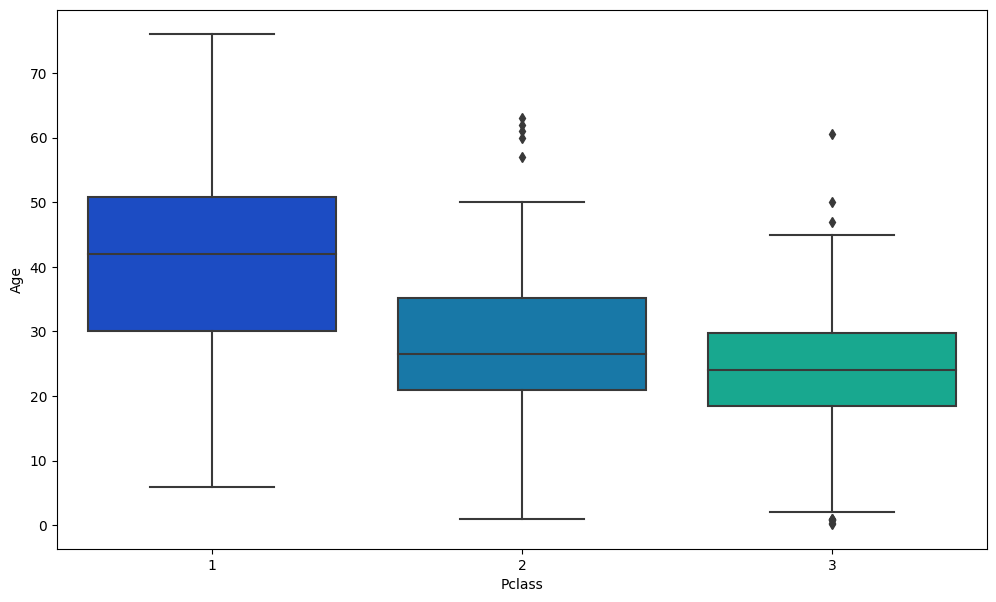

In [273]:
plt.figure(figsize=(12,7))
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [274]:
def imputeagetrain(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [275]:
def imputeagetest(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 41
        elif Pclass==2:
            return 28
        else:
            return 27
    else:
        return Age

In [276]:
train['Age']=train[['Age','Pclass']].apply(imputeagetrain,axis=1)
test['Age']=test[['Age','Pclass']].apply(imputeagetest,axis=1)

In [277]:
train.drop('Cabin',inplace=True,axis=1)
test.drop('Cabin',inplace=True,axis=1)

In [278]:
#train.head()
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [279]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
embarkedt=pd.get_dummies(test['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)
sext=pd.get_dummies(test['Sex'],drop_first=True)

In [280]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [281]:
train=pd.concat([train,sex,embarked],axis=1)
test=pd.concat([test,sext,embarkedt],axis=1)

In [282]:
test["Fare"]=test['Fare'].fillna(0)

In [283]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [284]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=0)

In [285]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
857,858,1,51.0,0,0,26.5500,1,0,1
52,53,1,49.0,1,0,76.7292,0,0,0
386,387,3,1.0,5,2,46.9000,1,0,1
124,125,1,54.0,0,1,77.2875,1,0,1
578,579,3,24.0,1,0,14.4583,0,0,0


In [286]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [287]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [288]:
result=rfc.predict(x_test)


In [289]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,result))


[[148  20]
 [ 26  74]]


In [290]:
accuracy_score(y_test,result)

0.8283582089552238

In [291]:
actualresult=rfc.predict(test)

In [292]:
tobepredicted=pd.concat([train,test])
tobepredicted.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


In [293]:
finalres=rfc.predict(tobepredicted.drop('Survived',axis=1))
finalres

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [294]:
submission=pd.DataFrame({'PassengerId':tobepredicted.PassengerId,'Survived':finalres})


In [295]:
submission.Survived=submission.Survived.astype(int)
print(submission.shape)

(1309, 2)


In [296]:
filename='Titanicpredictions.csv'
submission.to_csv(filename,index=False)
